#### Figure 1

##### Package imports, figure settings, color definitions
<img src="color_pal.png" width="500">

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


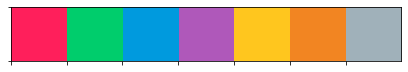

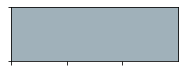

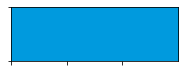

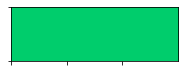

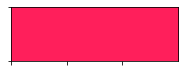

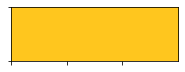

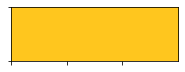

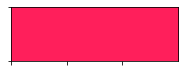

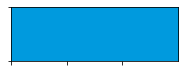

In [1]:
%matplotlib inline
%run settings_load.py

##### simple division model

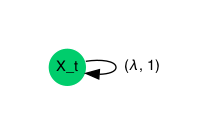

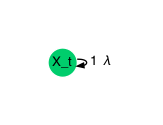

In [62]:
t = [
        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'l', 'type': 'S -> S + S', 'reaction_steps': 1}
        ]

net = me.Network('net_div_exp')
net.structure(t)

node_settings = {
    'X_t': {'label': 'X_t', 'color': "#00CD6C"}
}

edge_settings = {
    'l': {'label': '<I>&lambda;</I>', 'color': None}
}

me.plots.net_main_plot(net, node_settings=node_settings, edge_settings=edge_settings)
a = me.plots.net_hidden_plot(net, node_settings=node_settings, edge_settings=edge_settings)

[ 0.          0.78947368  1.57894737  2.36842105  3.15789474  3.94736842
  4.73684211  5.52631579  6.31578947  7.10526316  7.89473684  8.68421053
  9.47368421 10.26315789 11.05263158 11.84210526 12.63157895 13.42105263
 14.21052632 15.        ]
[ 0.          0.51724138  1.03448276  1.55172414  2.06896552  2.5862069
  3.10344828  3.62068966  4.13793103  4.65517241  5.17241379  5.68965517
  6.20689655  6.72413793  7.24137931  7.75862069  8.27586207  8.79310345
  9.31034483  9.82758621 10.34482759 10.86206897 11.37931034 11.89655172
 12.4137931  12.93103448 13.44827586 13.96551724 14.48275862 15.        ]


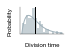

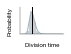

In [274]:
# broad and tight waiting time distributions
# broad
theta = 1.0/0.2
steps = 2
bins = np.linspace(0.0, 15.0, num=20)
print(bins)

x = np.linspace(0, 15, 1000)
y = stats.gamma.pdf(x, a=steps, loc=0, scale=theta/steps) # 'a' is shape
rvs = stats.gamma.rvs(a=steps, loc=0, scale=theta/steps, size=100) # size=10000

fig, ax = plt.subplots(figsize=(0.8, 0.5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.hist(rvs, bins=bins, density=True, color=grey, alpha=0.6)
ax.plot(x, y, linewidth=1.0, color=grey, label='')
plt.axvline(x=theta, linewidth=0.8, color='black')

# optional: hide numbers on axis
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

# leg = plt.legend()
# leg.get_frame().set_edgecolor('lightgrey')
plt.ylim((-0.003, None))
plt.xlabel('Division time')
plt.ylabel('Probability') # plt.ylabel('Probability density function')
plt.savefig(f'paper_figures/waiting_time_distr_scheme_broad_g2.pdf', bbox_inches='tight')

# tight
theta = 1.0/0.255
steps = 15
bins = np.linspace(0.0, 15.0, num=30)
print(bins)

x = np.linspace(0, 15, 1000)
y = stats.gamma.pdf(x, a=steps, loc=0, scale=theta/steps) # 'a' is shape
rvs = stats.gamma.rvs(a=steps, loc=0, scale=theta/steps, size=100) # size=10000

fig, ax = plt.subplots(figsize=(0.8, 0.5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.hist(rvs, bins=bins, density=True, color=grey, alpha=0.6)
ax.plot(x, y, linewidth=1.0, color=grey, label='')
plt.axvline(x=theta, linewidth=0.8, color='black')

# optional: hide numbers on axis
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

# leg = plt.legend()
# leg.get_frame().set_edgecolor('lightgrey')
plt.ylim((-0.005, None))
plt.xlabel('Division time')
plt.ylabel('Probability') # plt.ylabel('Probability density function')
plt.savefig(f'paper_figures/waiting_time_distr_scheme_broad_g15.pdf', bbox_inches='tight')

In [170]:
# broad model simulations
t = [
        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'l', 'type': 'S -> S + S', 'reaction_steps': 2}
        ]

net = me.Network('net_div_g2')
net.structure(t)

num_iter = 10 # 3
alpha_val = 0.6 # 0.8
variables = {'X_t': ('X_t', )}
initial_values = {'X_t': 1}
theta_values = {'l': 0.2}
time_values = np.linspace(0.0, 10.0, num=10000, endpoint=True)

sim = me.Simulation(net)
res_list = list()

for __ in range(num_iter):
    res_list.append(sim.simulate('gillespie', variables, initial_values, theta_values, time_values)[1])

sims = np.array(res_list)

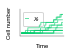

In [171]:
# settings = {
#     'X_t': {'label': '$X_t$', 'color': cactiv}
# }

# plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
# me.plots.sim_counts_plot(sim, settings=settings)
    
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.plot(time_values, sims[0, 0, :], color=cactiv, linewidth=1.0, zorder=1000, label='$X_t$', alpha=alpha_val) # color='darkgreen'
for trace_i in range(sims.shape[0]-1):
        plt.plot(time_values, sims[trace_i+1, 0, :], color=cactiv, linewidth=1.0, zorder=1000, alpha=alpha_val) # color='darkgreen'

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

# ax.set_ylim([-0.3, None])
# leg = plt.legend()
# plt.legend(frameon=False)
# leg.get_frame().set_edgecolor('lightgrey')
plt.xlabel('Time')
plt.ylabel('Cell number')
plt.ylim(-0.2, 10)
plt.legend()
#plt.ylabel('#Cells')
plt.savefig(f'paper_figures/sim_div_scheme_g2.pdf', bbox_inches='tight')

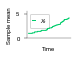

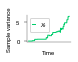

In [172]:
# mean and variance plots
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.plot(time_values, np.mean(sims[:, 0, :], axis=0),
        color=cactiv, linewidth=1.0, zorder=1000, label='$X_t$')

ax.set_xticklabels([])
plt.tick_params(axis = "x", which = "both",length=0)

plt.xlabel('Time')
plt.ylabel('Sample mean')
plt.ylim(0.0, 5.5)
plt.legend()
plt.savefig(f'paper_figures/sim_div_scheme_sample_mean_g2.pdf', bbox_inches='tight')

plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.plot(time_values, np.var(sims[:, 0, :], axis=0, ddof=1),
        color=cactiv, linewidth=1.0, zorder=1000, label='$X_t$')

ax.set_xticklabels([])
plt.tick_params(axis = "x", which = "both",length=0)

plt.xlabel('Time')
plt.ylabel('Sample variance')
plt.legend()
plt.savefig(f'paper_figures/sim_div_scheme_sample_var_g2.pdf', bbox_inches='tight')

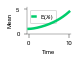

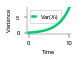

4.475012567019526

In [173]:
# moment solutions
sim = me.Simulation(net)
res = sim.simulate('moments', variables, initial_values, theta_values, time_values)

settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': cactiv},
}
me.plots.sim_mean_plot(sim, y_lim=(0.0, 5.5), settings=settings, save='paper_figures/sim_div_mom_scheme_g2_mean.pdf')

settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': cactiv},
}
me.plots.sim_variance_plot(sim, settings=settings, save='paper_figures/sim_div_mom_scheme_g2_var.pdf')

# last mean time point
sim.sim_moments_res[0][0, -1]

In [143]:
# tight model simulations
t = [
        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'l', 'type': 'S -> S + S', 'reaction_steps': 15}
        ]

net = me.Network('net_div_g15')
net.structure(t)

num_iter = 10 # 3
alpha_val = 0.6 # 0.8
variables = {'X_t': ('X_t', )}
initial_values = {'X_t': 1}
theta_values = {'l': 0.255}
time_values = np.linspace(0.0, 10.0, num=10000, endpoint=True)

sim = me.Simulation(net)
res_list = list()

for __ in range(num_iter):
    res_list.append(sim.simulate('gillespie', variables, initial_values, theta_values, time_values)[1])

sims = np.array(res_list)

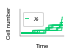

In [160]:
# settings = {
#     'X_t': {'label': '$X_t$', 'color': cactiv}
# }

# plt.rcParams.update({'figure.figsize': (1.2, 0.8)})
# me.plots.sim_counts_plot(sim, settings=settings)
    
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.plot(time_values, sims[0, 0, :], color=cactiv, linewidth=1.0, zorder=1000, label='$X_t$', alpha=0.8) # color='darkgreen'
for trace_i in range(sims.shape[0]-1):
        plt.plot(time_values, sims[trace_i+1, 0, :], color=cactiv, linewidth=1.0, zorder=1000, alpha=0.8) # color='darkgreen'

ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

# ax.set_ylim([-0.3, None])
# leg = plt.legend()
# plt.legend(frameon=False)
# leg.get_frame().set_edgecolor('lightgrey')
plt.xlabel('Time')
plt.ylabel('Cell number')
plt.ylim(-0.2, 10)
plt.legend()
#plt.ylabel('#Cells')
plt.savefig(f'paper_figures/sim_div_scheme_g15.pdf', bbox_inches='tight')

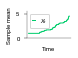

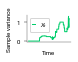

In [161]:
# mean and variance plots
plt.rcParams.update({'figure.figsize': (0.8, 0.5)})
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.plot(time_values, np.mean(sims[:, 0, :], axis=0),
        color=cactiv, linewidth=1.0, zorder=1000, label='$X_t$')

ax.set_xticklabels([])
plt.tick_params(axis = "x", which = "both",length=0)

plt.xlabel('Time')
plt.ylabel('Sample mean')
plt.ylim(0.0, 5.5)
plt.legend()
plt.savefig(f'paper_figures/sim_div_scheme_sample_mean_g15.pdf', bbox_inches='tight')

plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.plot(time_values, np.var(sims[:, 0, :], axis=0, ddof=1),
        color=cactiv, linewidth=1.0, zorder=1000, label='$X_t$')

ax.set_xticklabels([])
plt.tick_params(axis = "x", which = "both",length=0)

plt.xlabel('Time')
plt.ylabel('Sample variance')
plt.legend()
plt.savefig(f'paper_figures/sim_div_scheme_sample_var_g15.pdf', bbox_inches='tight')

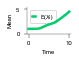

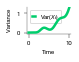

4.48138465306211

In [162]:
# moment solutions
sim = me.Simulation(net)
res = sim.simulate('moments', variables, initial_values, theta_values, time_values)

settings = {
    'X_t': {'label': 'E$(X_t)$', 'color': cactiv},
}
me.plots.sim_mean_plot(sim, y_lim=(0.0, 5.5), settings=settings, save='paper_figures/sim_div_mom_scheme_g15_mean.pdf')

settings = {
    ('X_t', 'X_t'): {'label': 'Var$(X_t)$', 'color': cactiv},
}
me.plots.sim_variance_plot(sim, settings=settings, save='paper_figures/sim_div_mom_scheme_g15_var.pdf')

# last mean time point
sim.sim_moments_res[0][0, -1]

##### waiting time distr schemes

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54.]


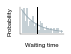

In [315]:
# exp
theta = 20
steps = 1
bins = np.linspace(0.0, 54.0, num=28)
print(bins)

x = np.linspace(0, 54, 1000)
y = stats.expon.pdf(x, scale=theta, loc=0) # 'a' is shape
rvs = stats.expon.rvs(scale=theta, loc=0, size=100) # size=10000

fig, ax = plt.subplots(figsize=(0.8, 0.5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.hist(rvs, bins=bins, density=True, color=grey, alpha=0.6)
ax.plot(x, y, linewidth=1.0, color=grey, label='')
plt.axvline(x=theta, linewidth=0.8, color='black')

# optional: hide numbers on axis
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

# leg = plt.legend()
# leg.get_frame().set_edgecolor('lightgrey')
plt.ylim((-0.003, None))
plt.xlabel('Waiting time')
plt.ylabel('Probability') # plt.ylabel('Probability density function')
plt.savefig(f'paper_figures/waiting_time_distr_scheme_exp.pdf', bbox_inches='tight')

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54.]


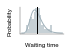

In [320]:
# gamma
theta = 20
steps = 7
bins = np.linspace(0.0, 54.0, num=28)
print(bins)

x = np.linspace(0, 54, 1000)
y = stats.gamma.pdf(x, a=steps, loc=0, scale=theta/steps) # 'a' is shape
rvs = stats.gamma.rvs(a=steps, loc=0, scale=theta/steps, size=100) # size=10000

fig, ax = plt.subplots(figsize=(0.8, 0.5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.hist(rvs, bins=bins, density=True, color=grey, alpha=0.6)
ax.plot(x, y, linewidth=1.0, color=grey, label='')
plt.axvline(x=theta, linewidth=0.8, color='black')

# optional: hide numbers on axis
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

# leg = plt.legend()
# leg.get_frame().set_edgecolor('lightgrey')
plt.ylim((-0.003, None))
plt.xlabel('Waiting time')
plt.ylabel('Probability') # plt.ylabel('Probability density function')
plt.savefig(f'paper_figures/waiting_time_distr_scheme_gamma.pdf', bbox_inches='tight')

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54.]
0.20102651839178787
0.5988023952095808
0.20017108639863132
1.0
9999


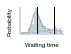

In [323]:
# phase type (ph)
theta1 = 1/(0.047 / 2) # 40
theta2 = 20
theta3 = 1/(0.026 / 2) # 76

steps1 = 10
steps2 = 14 
steps3 = 18

bins = np.linspace(0.0, 54.0, num=28)
print(bins)
w1 = steps1/theta1 / (steps1/theta1 + steps2/theta2 + steps3/theta3)
w2 = steps2/theta2 / (steps1/theta1 + steps2/theta2 + steps3/theta3)
w3 = steps3/theta3 / (steps1/theta1 + steps2/theta2 + steps3/theta3)
print(w1)
print(w2)
print(w3)
print(w1 + w2 + w3)

x = np.linspace(0, 54, 1000)
y1 = stats.gamma.pdf(x, a=steps1, loc=0, scale=theta1/steps1) # 'a' is shape
y2 = stats.gamma.pdf(x, a=steps2, loc=0, scale=theta2/steps2) # 'a' is shape
# y3 = stats.gamma.pdf(x, a=steps3, loc=0, scale=theta3/steps3) # 'a' is shape

rvs1 = stats.gamma.rvs(a=steps1, loc=0, scale=theta1/steps1, size=int(100 * w1))
rvs2 = stats.gamma.rvs(a=steps2, loc=0, scale=theta2/steps2, size=int(100 * w2))
# rvs3 = stats.gamma.rvs(a=steps3, loc=0, scale=theta3/steps3, size=int(10000 * w3))
print(int(10000 * w1) + int(10000 * w2) + int(10000 * w3))

fig, ax = plt.subplots(figsize=(0.8, 0.5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# the '0.5' in the weights come from the 2-hour interval in the bins
# ax.hist(rvs1, bins=bins, weights=np.full(rvs1.shape, 0.5/10000), density=False, color='gold', alpha=0.6)
# ax.hist(rvs2, bins=bins, weights=np.full(rvs2.shape, 0.5/10000), density=False, color='orange', alpha=0.6)
# ax.hist(rvs3, bins=bins, weights=np.full(rvs3.shape, 0.5/10000), density=False, color='dodgerblue', alpha=0.8)

# combined hist
ax.hist(np.concatenate([rvs1, rvs2]), bins=bins, 
        weights=np.full((rvs1.shape[0] + rvs2.shape[0],), 0.5/100), 
        density=False, color=grey, alpha=0.6)

ax.plot(x, w1 * y1, linewidth=1.0, color=grey, label='', 
        linestyle='--', zorder=100)
ax.plot(x, w2 * y2, linewidth=1.0, color=grey, label='', 
        linestyle='--', zorder=100)
# ax.plot(x, w3 * y3, linewidth=1.0, color='dodgerblue', label='')

ax.plot(x, w1 * y1 + w2 * y2, linewidth=1.0, color=grey, 
        label='', zorder=200) # + w3 * y3
plt.axvline(x=theta1, linewidth=0.8, color='black', zorder=250)
plt.axvline(x=theta2, linewidth=0.8, color='black', zorder=250)

# optional: hide numbers on axis
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.tick_params(axis=u'both', which=u'both',length=0)

# leg = plt.legend()
# leg.get_frame().set_edgecolor('lightgrey')
plt.ylim((-0.003, None))
plt.xlabel('Waiting time')
plt.ylabel('Probability') # plt.ylabel('Probability density function')
plt.savefig(f'paper_figures/waiting_time_distr_scheme_ph.pdf', bbox_inches='tight')

In [24]:
np.concatenate([rvs1, rvs2]).shape

(7998,)

##### moment differential equations for simple division model
also see Goodnotes, for a manual derivation

In [324]:
t = [
        {'start': 'X_t', 'end': 'X_t', 'rate_symbol': 'l', 'type': 'S -> S + S', 'reaction_steps': 2}
        ]

net = me.Network('net_div_g2')
net.structure(t)

num_iter = 3
initial_values = {'X_t': 1}
theta_values = {'l': 0.2}
time_values = np.linspace(0.0, 10.0, num=10000, endpoint=True)
variables = {'X_t': ('X_t', )}


sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)

In [347]:
print(sim.sim_moments.moment_order_hidden)
print('\n')
print(sim.sim_moments.moment_pde)
print('\n')
meqs = sim.sim_moments.moment_eqs
meqs = [s.replace('theta[0]', 'l') for s in meqs]
meqs = [s.replace('m[0]', 'E(X_0)') for s in meqs]
meqs = [s.replace('m[1]', 'E(X_1)') for s in meqs]
meqs = [s.replace('m[2]', 'E(X_0(X_0-1))') for s in meqs]
meqs = [s.replace('m[3]', 'E(X_0 X_1)') for s in meqs]
meqs = [s.replace('m[4]', 'E(X_1(X_1-1))') for s in meqs]
meqs[0] = 'd/dt E(X_0) = ' + meqs[0]
meqs[1] = 'd/dt E(X_1) = ' + meqs[1]
meqs[2] = 'd/dt E(X_0(X_0-1)) = ' + meqs[2]
meqs[3] = 'd/dt E(X_0 X_1) = ' + meqs[3]
meqs[4] = 'd/dt E(X_1(X_1-1)) = ' + meqs[4]
for e in meqs:
    print(e)

# E(X_0) = m[0]
# E(X_1) = m[1]
# E(X_0(X_0-1)) = m[2]
# E(X_0 X_1) = m[3]
# E(X_1(X_1-1)) = m[4]

[[('Z_0__centric',), ('Z_0__module_0__0',)], [('Z_0__centric', 'Z_0__centric'), ('Z_0__centric', 'Z_0__module_0__0'), ('Z_0__module_0__0', 'Z_0__module_0__0')]]


2.0 * theta_0_q * (z_0__module_0__0_q - z_0__centric_q) * diff(F(z_0__centric_q, z_0__module_0__0_q), z_0__centric_q) + 2.0 * theta_0_q * (z_0__centric_q * z_0__centric_q - z_0__module_0__0_q) * diff(F(z_0__centric_q, z_0__module_0__0_q), z_0__module_0__0_q)


d/dt E(X_0) = -2.0*E(X_0)*l + 4.0*E(X_1)*l
d/dt E(X_1) = 2.0*E(X_0)*l - 2.0*E(X_1)*l
d/dt E(X_0(X_0-1)) = 4.0*E(X_1)*l - 4.0*E(X_0(X_0-1))*l + 8.0*E(X_0 X_1)*l
d/dt E(X_0 X_1) = 2.0*E(X_0(X_0-1))*l - 4.0*E(X_0 X_1)*l + 4.0*E(X_1(X_1-1))*l
d/dt E(X_1(X_1-1)) = 4.0*E(X_0 X_1)*l - 4.0*E(X_1(X_1-1))*l
